In [8]:
# using python 3.11 for this 

import photutils
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
#from photutils.psf import fit_fwhm
from astropy.visualization import simple_norm
fn = '~/charis_mm_testing/HD25532/cubes/data/raw/good_frames/good_CRSA00154127_cube.fits'
import pyMuellerMat.common_mms as cmm
from pyMuellerMat import MuellerMat

In [11]:
mm = cmm.WollastonPrism()
mm_hwp = cmm.HWP()
sys_mm = MuellerMat.SystemMuellerMatrix([mm_hwp,mm])
sys_mm.master_property_dict
m1 = sys_mm.evaluate()
print(m1)

[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


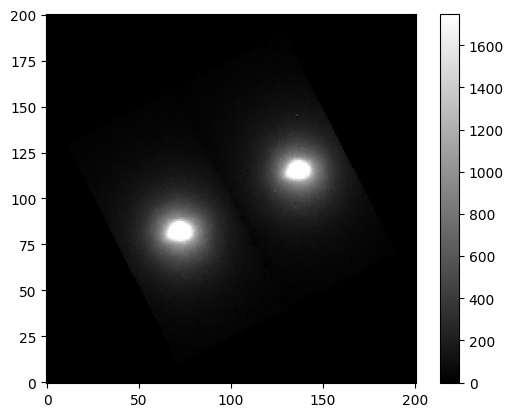

[12.49687517]


In [ ]:
test_hdul = fits.open(fn)
image_data = (test_hdul[1].data)#[:,:,:99]
image_data_right = (test_hdul[1].data)[:,:,100:200]
#aperture.plot(color='red')
snorm = simple_norm(image_data, 'linear', percent=99)
plt.imshow(image_data[2], origin='lower', cmap='gray', norm=snorm)

plt.colorbar()
plt.show()
guess = [77,77] # Star is unpol, so should be roughly the same on both sides
fwhm = fit_fwhm(image_data[5],xypos=guess,fit_shape=53)
print(fwhm)
